# Perceptron-AdaLine in python:
This is main workflow and functions you need. but if there is something missing or you need to add more or remove something feel free to try it.  
**JUST dont change _Pereceptron_ and _Adaline_  class methods**(their argumants only) 

In [38]:
import numpy as np
np.random.seed(36) #dont change this line
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
# download dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshaping Data
x_train = x_train.reshape(-1, 784).astype('float32')
x_test = x_test.reshape(-1, 784).astype('float32')


# Building PCA Of Data

In [49]:
def standardize_data(arr):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    print(rows, columns)
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        if np.mod(column, 10000) == 0:
            print("column" ,column)
            
        
        mean = np.mean(arr[:,column])
        
        
        std = np.std(arr[:,column])
        
        
        std = std + 0.0001
        tempArray = np.empty(0)
        
        for element in arr[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

# Standardizing data
X_prime =  x_train.reshape(-1, 784).astype('float32')
y = y_train
X_prime = X_prime[0:1000,:]
X = standardize_data(X_prime)
print(X.shape)

1000 784
column 0
(1000, 784)


In [50]:
# Calculating the covariance matrix
covariance_matrix = np.cov(X.T)

# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

Eigenvector: 
 [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 1.+0.j]] 

Eigenvalues: 
 [ 3.95917330e+01+0.00000000e+00j  3.34214271e+01+0.00000000e+00j
  2.78370671e+01+0.00000000e+00j  2.12525556e+01+0.00000000e+00j
  1.94666964e+01+0.00000000e+00j  1.64098412e+01+0.00000000e+00j
  1.46541772e+01+0.00000000e+00j  1.35599337e+01+0.00000000e+00j
  1.19898829e+01+0.00000000e+00j  1.14413221e+01+0.00000000e+00j
  1.00093582e+01+0.00000000e+00j  9.75446550e+00+0.00000000e+00j
  8.81890119e+00+0.00000000e+00j  8.67091139e+00+0.00000000e+00j
  8.43658316e+00+0.00000000e+00j  8.02098672e+00+0.00000000e+00j
  7.75767874e+00+0.00000000e+00j  7.47413016e+00+0.00000000e+00j
  6.98257043e+00+0.00000000e+00j  6.80088812e+00+0.00000000e+00j
  6.44825017e+00+0

In [51]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)



[  6.49470397+0.00000000e+00j  11.97721911+0.00000000e+00j
  16.5436651 +0.00000000e+00j  20.02997516+0.00000000e+00j
  23.22332945+0.00000000e+00j  25.91523134+0.00000000e+00j
  28.31913073+0.00000000e+00j  30.54352831+0.00000000e+00j
  32.51037175+0.00000000e+00j  34.38722821+0.00000000e+00j
  36.02918256+0.00000000e+00j  37.62932383+0.00000000e+00j
  39.07599333+0.00000000e+00j  40.4983863 +0.00000000e+00j
  41.88233961+0.00000000e+00j  43.19811769+0.00000000e+00j
  44.47070222+0.00000000e+00j  45.69677289+0.00000000e+00j
  46.84220717+0.00000000e+00j  47.95783792+0.00000000e+00j
  49.01562127+0.00000000e+00j  50.04928813+0.00000000e+00j
  51.03934134+0.00000000e+00j  52.00142388+0.00000000e+00j
  52.93861935+0.00000000e+00j  53.81812615+0.00000000e+00j
  54.66806343+0.00000000e+00j  55.48625125+0.00000000e+00j
  56.27530423+0.00000000e+00j  57.055129  +0.00000000e+00j
  57.80515098+0.00000000e+00j  58.53293898+0.00000000e+00j
  59.25291369+0.00000000e+00j  59.95757508+0.00000000e+0

In [55]:
# Using two first components (because those explain more than 95%)
projection_matrix = (eigen_vectors.T[:][:2]).T
print(projection_matrix)
# Getting the product of original standardized X and the eigenvectors 
X_pca = X.dot(projection_matrix)
print(X_pca)

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
[[  0.51196627+0.j  -2.96463979+0.j]
 [ -8.20137747+0.j  -7.12335588+0.j]
 [ -3.11312029+0.j   7.9351213 +0.j]
 ...
 [ -3.71955298+0.j -12.07262468+0.j]
 [ -2.73705213+0.j   0.95973787+0.j]
 [  3.71636749+0.j  -5.43243679+0.j]]


# Perceptron algorithm:

In [66]:
class Pereceptron(object):
  """
  Perceptorn classifier for mnist dataset, 
  """
  def __init__(self,num_classes=3):
    self.w = []
    self.num_classes = 10
    self.output_classes = [1,2,3,4,5,6,7,8,9]
     
  def fit(self, x_train,y_train,batch_size=128, n_itr=50, eta=0.01, verbose=True):
    """
    Fit on training data.
    params:
      x_train: normalized mnist train data with shape(N,28,28)
      y_train: mnist train labels with shape(N,)
      batch_size: batch size for training
      n_itr: number of iterations to perfom training
      eta: learning rate (between 0. and 1.)
      verbose: print error every epoch
    return:
      list of errors
    """
    
    # Choosing 3 Classes
    num_classes = self.num_classes
    output_classes = self.output_classes
    
    x_train_final = []
    y_train_final = []
    
       
    for i in range(x_train.shape[0]):  
        for j in range(len(output_classes)):
            if y_train[i] == output_classes[j]:
                x_train_final.append(x_train[i])
                y_train_final.append(y_train[i])
                                    
    x_train_final = np.stack( x_train_final )
    
    # One Hot Out Put
    y_train_one_hot = -1* np.ones( (len(y_train_final), num_classes) )
    
    i = 0
    for y in y_train_final:
        if y == output_classes[0]:
            y_train_one_hot[i,0] = 1
            i = i + 1
        elif y == output_classes[1]:
            y_train_one_hot[i,1] = 1
            i = i + 1
        elif y == output_classes[2]:
            y_train_one_hot[i,2] = 1
            i = i + 1
    
            
            
    
    
    
    
    # Normalizae Data
    gray_scale = 255
    x_train_final /= gray_scale
    self.w = np.zeros(( x_train_final.shape[1] + 1 , num_classes))
    
    # Initialize Weights
    self._initialize()
    
    
    for itr in range(n_itr):
        
        
        train_history = []
        index = 0
        while(index <= x_train_final.shape[0] - batch_size ):
            num_of_errors = 0
            
            
                        
            X_Batch = x_train_final[index:index + batch_size ]
            Y = y_train_one_hot[index:index + batch_size]
            X = np.ones((batch_size, x_train_final.shape[1] + 1))
            
            X[:,1:] = X_Batch
            predictions = self.predict(X, batch_size=batch_size)
            
            X_Wrong = []
            Y_Wrong = []
            
            
            for n in range(predictions.shape[0]):
                if (Y[n] != predictions[n]).any():
                    num_of_errors = num_of_errors + 1
                    X_Wrong.append(X[n])
                    Y_Wrong.append(Y[n])
            
            X_Wrong = np.array(X_Wrong)
            Y_Wrong = np.array(Y_Wrong)
            
            self.w = self.w + eta*(np.matmul(X_Wrong.T, Y_Wrong))
            index = index + batch_size
            train_history.append(num_of_errors)
                 
    
    
    return train_history

  def _initialize(self):
    self.w = np.random.normal(0, 0.1, self.w.shape )
    
  def evaluate(self, x_test,y_test, batch_size=128):
    
    num_classes = self.num_classes
    output_classes = self.output_classes
    
    x_test_final = []
    y_test_final = []
    
    for i in range(y_test.shape[0]):  
        if y_test[i] == output_classes[0] or y_test[i] == output_classes[1] or y_test[i] == output_classes[2]:
            x_test_final.append(x_test[i])
            y_test_final.append(y_test[i])
    
    # Converting To Array
    x_test_final = np.stack(x_test_final )
    
    # One Hot Output
    y_test_one_hot = -1* np.ones( (len(y_test_final), num_classes) )
    i = 0
    for y in y_test_final:
        if y == output_classes[0]:
            y_test_one_hot[i,0] = 1
            i = i + 1
        elif y == output_classes[1]:
            y_test_one_hot[i,1] = 1
            i = i + 1
        elif y == output_classes[2]:
            y_test_one_hot[i,2] = 1
            i = i + 1
    
    
    
    # Normalizae Data
    gray_scale = 255
    x_test_final /= gray_scale        
        
    index = 0
    correct_guesses = 0
    while(index <= x_test_final.shape[0] - batch_size ):
            
                        
        X_Batch = x_test_final[index:index + batch_size]
        Y = y_test_one_hot[index:index + batch_size]
        X = np.ones((batch_size, x_test_final.shape[1] + 1))
            
        X[:,1:] = X_Batch
        predictions = self.predict(X, batch_size=batch_size)
            
            
        for n in range(predictions.shape[0]):
            if (Y[n] == predictions[n]).all():
                correct_guesses = correct_guesses + 1
                
                
        index = index + batch_size
        
    accuracy = correct_guesses/x_test_final.shape[0]            
            
    """
    evaluate model
    params:
      x_test: normalized mnist test data with shape(N,28,28)
      y_test: mnist test labels with shape(N,)
      batch_size: batch size for batch operation
    """
    return accuracy
    

  def predict(self, X, batch_size=128):
    deliver_complete_output = False
    
    
    
    if X.shape[0] < batch_size:
        deliver_complete_output = True
        X = X.reshape(-1, 784).astype('float32')
        gray_scale = 255
        X /= gray_scale
        X_Final = np.ones((X.shape[0], X.shape[1] + 1))            
        X_Final[:,1:] = X
        X = X_Final
        
        
        
        
    y_predicted = np.matmul(X, self.w)
    
    predictions = -1* np.ones(y_predicted.shape)
    for i in range(y_predicted.shape[0]):
        maximum = 0
        maximum_index = 0
        for j in range(y_predicted.shape[1]):
            if y_predicted[i,j] > maximum:
                maximum = y_predicted[i,j]
                maximum_index = j
        predictions[i, maximum_index] = 1
        
    if deliver_complete_output:
        predictions = self.output_classes[maximum_index]
        '''
        for i in range(predictions.shape[0]):
            for j in range(predictions.shape[1]):
                print(predictions[i, j])
                if predictions[i, j] > 0:
                    y_complete = self.output_classes[j]
                    predictions = y_complete
        '''
        

        

    return predictions
    


    

## Normal Train

test accuracy:  0.9381608458827299


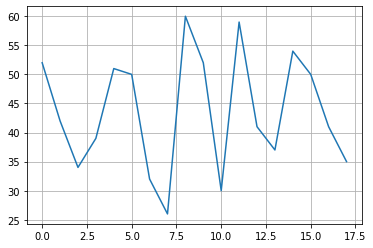

In [66]:
# train:
model = Pereceptron()
history = model.fit(x_train, y_train,batch_size=1024, n_itr=100,eta=0.05, verbose=False)
test_acc = model.evaluate(x_test, y_test)
print("test accuracy: ",test_acc)
plt.plot(history)
plt.grid()
plt.show()


## PCA Form Train

test accuracy:  0.0


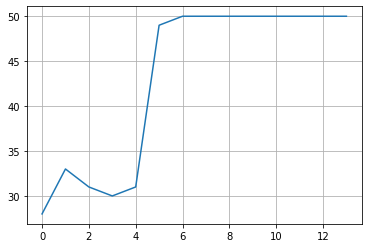

In [75]:
# train:
model = Pereceptron()
X_pca = np.real(X_pca)
history = model.fit(X_pca[0:800,:], y_train[0:800],batch_size=50, n_itr=100,eta=0.05, verbose=False)
test_acc = model.evaluate(X_pca[800:,:], y_test[800:1000])
print("test accuracy: ",test_acc)
plt.plot(history)
plt.grid()
plt.show()


## Predicting a sample

prediction:  6  true label:  6


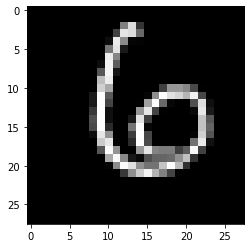

In [56]:
# make a prediction
n = 100

pred = model.predict(x_test[n])
print('prediction: ', pred, " true label: ",y_test[n])
plt.imshow(x_test[n], cmap='gray')


# Adaline algorithm

In [78]:
class Adaline(object):
  """
  Adaline classifier for mnist dataset, 
  """
  def __init__(self,num_classes=3):
    self.w = []
    self.num_classes = 3
    self.output_classes = [1, 3, 8]
     
  def fit(self, x_train,y_train,batch_size=128, n_itr=50, eta=0.01, verbose=True):
    """
    Fit on training data.
    params:
      x_train: normalized mnist train data with shape(N,28,28)
      y_train: mnist train labels with shape(N,)
      batch_size: batch size for training
      n_itr: number of iterations to perfom training
      eta: learning rate (between 0. and 1.)
      verbose: print error every epoch
    return:
      list of errors
    """
    
    # Choosing 3 Classes
    num_classes = self.num_classes
    output_classes = self.output_classes
    
    x_train_final = []
    y_train_final = []
    
       
    for i in range(y_train.shape[0]):  
        if y_train[i] == output_classes[0] or y_train[i] == output_classes[1] or y_train[i] == output_classes[2]:
            x_train_final.append(x_train[i])
            y_train_final.append(y_train[i])
                                    
    
    x_train_final = np.stack( x_train_final )
    
    # One Hot Out Put
    y_train_one_hot = -1* np.ones( (len(y_train_final), num_classes) )
    
    i = 0
    for y in y_train_final:
        if y == output_classes[0]:
            y_train_one_hot[i,0] = 1
            i = i + 1
        elif y == output_classes[1]:
            y_train_one_hot[i,1] = 1
            i = i + 1
        elif y == output_classes[2]:
            y_train_one_hot[i,2] = 1
            i = i + 1
    
            
            
    
    
    
    
    # Normalizae Data
    gray_scale = 255
    x_train_final /= gray_scale
    self.w = np.zeros(( x_train_final.shape[1] + 1 , num_classes))
    # Initialize Weights
    self._initialize()
    
    
    for itr in range(n_itr):
        
        train_history = []
        index = 0
        while(index <= x_train_final.shape[0] - batch_size ):
            
            num_of_errors = 0
                        
            X_Batch = x_train_final[index:index + batch_size]
            Y = y_train_one_hot[index:index + batch_size]
            X = np.ones((batch_size, x_train_final.shape[1] + 1))
            
            X[:,1:] = X_Batch
            predictions, y_predicted = self.predict(X, batch_size=batch_size)
            
            X_Wrong = []
            Y_Wrong = []
            
            
            for n in range(predictions.shape[0]):
                if (Y[n] != predictions[n]).any():
                    num_of_errors = num_of_errors + 1
                    X_Wrong.append(X[n])
                    Y_Wrong.append(y_predicted[n])
            
            X_Wrong = np.array(X_Wrong)
            Y_Wrong = np.array(Y_Wrong)
            
            self.w = self.w + eta*(np.matmul(X_Wrong.T, Y_Wrong))
            train_history.append(num_of_errors)
            
            index = index + batch_size

    
    return train_history

  def _initialize(self):
    self.w = np.random.normal(0, 0.1, self.w.shape )
    
  def evaluate(self, x_test,y_test, batch_size=128):
    
    num_classes = self.num_classes
    output_classes = self.output_classes
    
    x_test_final = []
    y_test_final = []
    
    for i in range(y_test.shape[0]):  
        if y_test[i] == output_classes[0] or y_test[i] == output_classes[1] or y_test[i] == output_classes[2]:
            x_test_final.append(x_test[i])
            y_test_final.append(y_test[i])
    
    # Converting To Array
    x_test_final = np.stack(x_test_final )
    
    # One Hot Output
    y_test_one_hot = -1* np.ones( (len(y_test_final), num_classes) )
    i = 0
    for y in y_test_final:
        if y == output_classes[0]:
            y_test_one_hot[i,0] = 1
            i = i + 1
        elif y == output_classes[1]:
            y_test_one_hot[i,1] = 1
            i = i + 1
        elif y == output_classes[2]:
            y_test_one_hot[i,2] = 1
            i = i + 1
    
    
    
    # Normalizae Data
    gray_scale = 255
    x_test_final /= gray_scale        
        
    index = 0
    correct_guesses = 0
    while(index <= x_test_final.shape[0] - batch_size ):
            
                        
        X_Batch = x_test_final[index:index + batch_size]
        Y = y_test_one_hot[index:index + batch_size]
        X = np.ones((batch_size, x_test_final.shape[1] + 1))
            
        X[:,1:] = X_Batch
        predictions, y_predicted = self.predict(X, batch_size=batch_size)
            
            
        for n in range(predictions.shape[0]):
            if (Y[n] == predictions[n]).all():
                correct_guesses = correct_guesses + 1
                
                
        index = index + batch_size
        
    accuracy = correct_guesses/x_test_final.shape[0]            
            
    """
    evaluate model
    params:
      x_test: normalized mnist test data with shape(N,28,28)
      y_test: mnist test labels with shape(N,)
      batch_size: batch size for batch operation
    """
    return accuracy
    

  def predict(self, X, batch_size=128):
    deliver_complete_output = False
    
    
    
    if X.shape[0] != batch_size:
        deliver_complete_output = True
        X = X.reshape(-1, 784).astype('float32')
        gray_scale = 255
        X /= gray_scale
        X_Final = np.ones((X.shape[0], X.shape[1] + 1))            
        X_Final[:,1:] = X
        X = X_Final
        
        
        
        
    y_predicted = np.matmul(X, self.w)
    
    predictions = -1* np.ones(y_predicted.shape)
    for i in range(y_predicted.shape[0]):
        maximum = 0
        maximum_index = 0
        for j in range(y_predicted.shape[1]):
            if y_predicted[i,j] > maximum:
                maximum = y_predicted[i,j]
                maximum_index = j
        predictions[i, maximum_index] = 1
        
    if deliver_complete_output:
        predictions = self.output_classes[maximum_index]
        '''
        for i in range(predictions.shape[0]):
            for j in range(predictions.shape[1]):
                print(predictions[i, j])
                if predictions[i, j] > 0:
                    y_complete = self.output_classes[j]
                    predictions = y_complete
        '''
        

        

    return predictions, y_predicted
    


    

## Normal Training

C:\Python\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: overflow encountered in matmul
C:\Python\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:195: RuntimeWarning: invalid value encountered in matmul


test accuracy:  0.35876883616543764


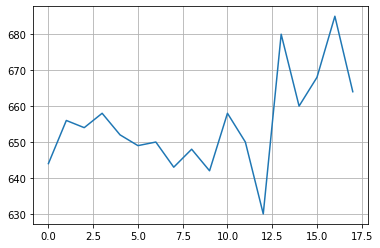

In [62]:
# train:
model = Adaline()
history = model.fit(x_train, y_train,batch_size=1024, n_itr=50,eta=0.05, verbose=False)
test_acc = model.evaluate(x_test, y_test)
print("test accuracy: ",test_acc)
plt.plot(history)
plt.grid()
plt.show()


## PCA Training

test accuracy:  0.0
[28, 30, 28, 30]


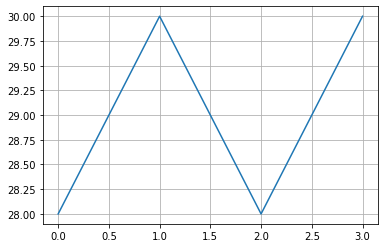

In [79]:
# train:
model = Adaline()
X_pca = np.real(X_pca)
history = model.fit(X_pca[0:800,:], y_train[0:800],batch_size=50, n_itr=100,eta=0.05, verbose=False)
test_acc = model.evaluate(X_pca[800:,:], y_test[800:1000])
print("test accuracy: ",test_acc)
print(history)
plt.plot(history)
plt.grid()
plt.show()

prediction:  1  true label:  6


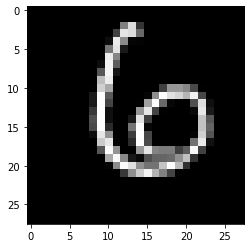

In [63]:
# make a prediction
n = 100
pred, y_predicted = model.predict(x_test[n])
print('prediction: ', pred, " true label: ",y_test[n])
plt.imshow(x_test[n], cmap='gray')


## Report Part

### Comparison Between Perceptron And Adaline

As a comparison the main difference between the two, is that a Perceptron takes that binary response (like a classification result) and computes an error used to update the weights, whereas an Adaline uses a continous response value to update the weights (so before the binarized output is produced).

The fact that the Adaline does this, allows its updates to be more repesentative of the actual error, before it is thresholded, which in turn allows a model to converge more quickly. But the computations of perceptron is easier.

### Comparison Between PCA and Normal 

We use PCA when we want to reduce the number of features and reduce our computation. But it brings more error in the training process, because we are losing data by reducing the number of features. We usually use PCA when data variances in some dimensions are so higher than in other dimensions, so deleting other components would not produce a large amount of error in the model.